# Supervised Machine Learning

Supervised machine learning is the machine learning task of learning a function that maps an input to an output based on example input-output pairs. It infers a function from labeled training data consisting of a set of training examples. Each example is a pair consisting of an input object and a desired output value. 

## Problem Statement

In this problem we will predict the percentage of marks that a student is expected to score based on the number of hours they studied. 

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


### Dataset

In [2]:
data = pd.read_csv("data.csv")

In [3]:
data.shape

(25, 2)

In [4]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


And now, let's plot our data points on 2-D graph, to check whether there is any relationship between the data.

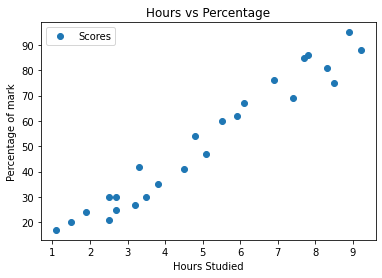

In [6]:
data.plot(x = "Hours", y = "Scores", style = "o")
plt.title("Hours vs Percentage")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage of mark")
plt.show()

### Preparing the data

Now let's divide the data into attributes and labels. Attributes are the independent variables while labels are dependent variables whose values are to be predicted. In our dataset Hours will be considered as attribute and Score will be considered as label. Let's extract the attributes and labels.

In [7]:
x = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

The next step is to split this data into training and testing sets. 

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=0)

The above script splits 80% of the data to training set while 20% of the data to test set. The test_size variable is where we actually specify the propotion of test set.

### Training the algorithm

As we split the data into training and testing set, its time to train our algorithm.

In [10]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [11]:
# To retrive the intercept
print(regressor.intercept_)

2.018160041434683


In [12]:
# For retriving the slope(coefficient of x)
print(regressor.coef_)

[9.91065648]


The above result says that, if a student studies one hour more than they previously studied for an exam, they can expect to achieve an increase of 9.91% in the score achieved by the student previously. 

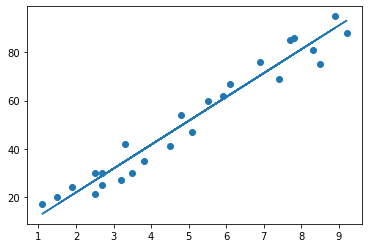

In [21]:
# Plotting the regression line
line = regressor.coef_*x+regressor.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

### Making Predictions

Now that we have trained our algorithm, its time to make some predictions.

In [14]:
print(x_test)
y_pred = regressor.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


Compare the actual output values for x_test with the predicted values.

In [15]:
df = pd.DataFrame({"Actual": y_test,
                  "Predicted": y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Evaluating the algorithm

The final step is to evaluate the performance of algorithm.
* Mean Absolute Error
* Mean Squared Error
* Root Mean Squared Error

In [22]:
from sklearn import metrics
print("Mean Absolute Error :", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error  :", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error :", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error : 4.183859899002975
Mean Squared Error  : 21.5987693072174
Root Mean Squared Error : 4.6474476121003665


You can see that the value of root mean squared error is 4.64, which is less than 10% of the mean value of the percentages of all the students, i.e. 51.48. This means that our algorithm did a decent job.

### Predicting the score

In [35]:
predicted_score = regressor.predict([[9.25]])
print("The score of the student is :", predicted_score)

The score of the student is : [93.69173249]


In [36]:
predicted_score = regressor.predict([[5.87]])
print("The score of the student is :", predicted_score)

The score of the student is : [60.19371358]
